In [226]:
import pandas as pd
import datetime
import random
from datetime import datetime,date,timedelta
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [227]:
df=pd.read_csv('C:\\Users\\Shubham Tiwary\\Desktop\\MerchantSuccessLearnathon\\sampleTransactions.csv')

In [228]:
df.shape

(29631, 6)

In [229]:
#dataframe
df.head()

,order_id,merchant_id,txn_initiated,txn_last_modified,gateway,status
0,TEST_Y56H161611,Merchant1,10-14-2020 15:27:48,10-22-2020 15:36:24,Gateway1,PENDING
1,TEST_9DFZ161419,Merchant1,10-12-2020 18:19:31,10-22-2020 18:32:46,Gateway1,PENDING
2,TEST_2X2S161407,Merchant1,10-12-2020 14:58:33,10-22-2020 15:07:51,Gateway1,PENDING
3,TEST_2742220jp4,Merchant2,10-15-2020 11:40:20,10-15-2020 12:05:58,Gateway2,PENDING
4,TEST_3227301jp6,Merchant2,10-21-2020 02:25:01,10-23-2020 02:35:45,Gateway1,PENDING


In [230]:
df.txn_initiated=pd.to_datetime(df['txn_initiated'])
df.txn_last_modified=pd.to_datetime(df['txn_last_modified'])

In [231]:
#Duplicated Order ids
temp=df.order_id.duplicated(keep=False)
df[temp]

,order_id,merchant_id,txn_initiated,txn_last_modified,gateway,status
6,TEST_3194429jp1,Merchant2,2020-10-20 17:17:09,2020-10-20 17:56:36,Gateway2,PENDING
8,TEST_2819393jp0,Merchant2,2020-10-16 09:06:33,2020-10-16 09:34:05,Gateway2,PENDING
21,TEST_3191557jp5,Merchant2,2020-10-20 16:29:17,2020-10-20 16:50:07,Gateway2,PENDING
27,TEST_3416263jp1,Merchant2,2020-10-23 06:54:23,2020-10-23 16:09:08,Gateway1,PENDING
30,TEST_2602931jp8,Merchant2,2020-10-13 20:58:52,2020-10-14 00:48:05,Gateway2,PENDING
...,...,...,...,...,...,...
29461,TEST_3165366jp9,Merchant2,2020-10-20 09:12:47,2020-10-20 09:13:10,Gateway2,SUCCESS
29496,TEST_3203295jp0,Merchant2,2020-10-20 19:44:55,2020-10-20 20:13:17,Gateway1,SUCCESS
29531,TEST_3299650jp3,Merchant2,2020-10-21 22:30:50,2020-10-21 22:32:33,Gateway1,SUCCESS
29570,TEST_2563132jp6,Merchant2,2020-10-13 09:55:32,2020-10-13 09:58:27,Gateway2,SUCCESS


In [232]:
#Removing duplicacy
df1=(df[['order_id', 'txn_initiated', 'merchant_id']].groupby(['order_id'])).min()
df2=df[['order_id', 'txn_last_modified','status']].groupby(['order_id']).max()
fdf=pd.merge(df1,df2, on='order_id')
fdf

,txn_initiated,merchant_id,txn_last_modified,status
order_id,,,,
TEST_0006162471,2020-10-20 10:14:29,Merchant1,2020-10-20 10:14:51,SUCCESS
TEST_001M162040,2020-10-17 13:10:11,Merchant1,2020-10-17 13:11:14,SUCCESS
TEST_002J162438,2020-10-19 20:06:56,Merchant1,2020-10-19 20:07:15,SUCCESS
TEST_008B162537,2020-10-20 22:20:15,Merchant1,2020-10-20 22:22:09,SUCCESS
TEST_008H162427,2020-10-19 18:14:42,Merchant1,2020-10-19 18:15:03,SUCCESS
...,...,...,...,...
TEST_zvP5Wlb4Nb,2020-10-17 11:56:12,Merchant4,2020-10-22 12:11:24,PENDING
TEST_zvP5k2a63d,2020-10-16 17:05:18,Merchant4,2020-10-22 17:17:33,PENDING
TEST_zw5onamij0,2020-10-13 11:49:47,Merchant3,2020-10-13 11:50:26,SUCCESS


In [233]:
#Still Pending
still_pending=fdf[['merchant_id','status']][fdf.status=='PENDING']
still_pending #order ids

,merchant_id,status
order_id,,
TEST_019E162019,Merchant1,PENDING
TEST_030l7v2k7y,Merchant3,PENDING
TEST_05W4162076,Merchant1,PENDING
TEST_05gfm7obs6,Merchant3,PENDING
TEST_0614161891,Merchant1,PENDING
...,...,...
TEST_zdPwgR5Lew,Merchant4,PENDING
TEST_zey9pc5e99,Merchant3,PENDING
TEST_zv0529vXLw,Merchant4,PENDING


In [234]:
#number of merchants
still_pending['merchant_id'].unique().tolist()

['Merchant1', 'Merchant3', 'Merchant2', 'Merchant4']

In [235]:
#Delay
tmp=fdf.txn_last_modified-fdf.txn_initiated
#sorted(tmp, reverse=True)
max(tmp) # max delay

Timedelta('10 days 00:53:47')

In [236]:
fdf['delay']=fdf.txn_last_modified-fdf.txn_initiated
fdf

,txn_initiated,merchant_id,txn_last_modified,status,delay
order_id,,,,,
TEST_0006162471,2020-10-20 10:14:29,Merchant1,2020-10-20 10:14:51,SUCCESS,0 days 00:00:22
TEST_001M162040,2020-10-17 13:10:11,Merchant1,2020-10-17 13:11:14,SUCCESS,0 days 00:01:03
TEST_002J162438,2020-10-19 20:06:56,Merchant1,2020-10-19 20:07:15,SUCCESS,0 days 00:00:19
TEST_008B162537,2020-10-20 22:20:15,Merchant1,2020-10-20 22:22:09,SUCCESS,0 days 00:01:54
TEST_008H162427,2020-10-19 18:14:42,Merchant1,2020-10-19 18:15:03,SUCCESS,0 days 00:00:21
...,...,...,...,...,...
TEST_zvP5Wlb4Nb,2020-10-17 11:56:12,Merchant4,2020-10-22 12:11:24,PENDING,5 days 00:15:12
TEST_zvP5k2a63d,2020-10-16 17:05:18,Merchant4,2020-10-22 17:17:33,PENDING,6 days 00:12:15
TEST_zw5onamij0,2020-10-13 11:49:47,Merchant3,2020-10-13 11:50:26,SUCCESS,0 days 00:00:39


In [237]:
#All the transactions that took more than 10 minutes of time
fdf[fdf.delay>= timedelta(seconds=600)]

,txn_initiated,merchant_id,txn_last_modified,status,delay
order_id,,,,,
TEST_019E162019,2020-10-17 09:58:47,Merchant1,2020-10-22 10:11:24,PENDING,5 days 00:12:37
TEST_025T158666,2020-10-15 07:15:22,Merchant1,2020-10-16 07:28:26,SUCCESS,1 days 00:13:04
TEST_030l7v2k7y,2020-10-23 19:01:47,Merchant3,2020-10-23 19:25:18,PENDING,0 days 00:23:31
TEST_040S161456,2020-10-13 07:24:14,Merchant1,2020-10-13 07:52:22,SUCCESS,0 days 00:28:08
TEST_05W4162076,2020-10-17 17:17:04,Merchant1,2020-10-22 17:31:36,PENDING,5 days 00:14:32
...,...,...,...,...,...
TEST_zdPwgR5Lew,2020-10-16 15:42:24,Merchant4,2020-10-22 15:53:10,PENDING,6 days 00:10:46
TEST_zey9pc5e99,2020-10-13 13:52:50,Merchant3,2020-10-14 00:34:33,PENDING,0 days 10:41:43
TEST_zv0529vXLw,2020-10-22 17:34:14,Merchant4,2020-10-23 02:45:33,PENDING,0 days 09:11:19


In [238]:
fdf[fdf.status=='PENDING']

,txn_initiated,merchant_id,txn_last_modified,status,delay
order_id,,,,,
TEST_019E162019,2020-10-17 09:58:47,Merchant1,2020-10-22 10:11:24,PENDING,5 days 00:12:37
TEST_030l7v2k7y,2020-10-23 19:01:47,Merchant3,2020-10-23 19:25:18,PENDING,0 days 00:23:31
TEST_05W4162076,2020-10-17 17:17:04,Merchant1,2020-10-22 17:31:36,PENDING,5 days 00:14:32
TEST_05gfm7obs6,2020-10-12 23:01:22,Merchant3,2020-10-14 11:18:05,PENDING,1 days 12:16:43
TEST_0614161891,2020-10-16 17:05:45,Merchant1,2020-10-22 17:20:17,PENDING,6 days 00:14:32
...,...,...,...,...,...
TEST_zdPwgR5Lew,2020-10-16 15:42:24,Merchant4,2020-10-22 15:53:10,PENDING,6 days 00:10:46
TEST_zey9pc5e99,2020-10-13 13:52:50,Merchant3,2020-10-14 00:34:33,PENDING,0 days 10:41:43
TEST_zv0529vXLw,2020-10-22 17:34:14,Merchant4,2020-10-23 02:45:33,PENDING,0 days 09:11:19


In [239]:
fdf.txn_last_modified.max()

Timestamp('2020-10-23 20:00:01')

In [240]:
fdf.txn_last_modified.min()

Timestamp('2020-10-12 05:31:17')

In [241]:
l=[str(e) for e in fdf.txn_last_modified ]
m=[e  for e in  fdf.status ]

l, m = (list(t) for t in zip(*sorted(zip(l,m))))
datee=[]
timee=[]
i=0
for e in l:
    if m[i]=="PENDING":
        k=e.split(" ")
        datee.append(k[0])
        timee.append(k[1])
    i=i+1

In [242]:
datee

['2020-10-13',
 '2020-10-13',
 '2020-10-13',
 '2020-10-13',
 '2020-10-13',
 '2020-10-13',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-

In [243]:
timee

['23:46:13',
 '23:49:41',
 '23:52:52',
 '23:54:54',
 '23:57:58',
 '23:58:47',
 '00:00:21',
 '00:00:53',
 '00:00:56',
 '00:01:58',
 '00:04:47',
 '00:04:54',
 '00:08:31',
 '00:12:11',
 '00:12:42',
 '00:12:59',
 '00:13:31',
 '00:13:34',
 '00:14:56',
 '00:15:06',
 '00:15:19',
 '00:18:01',
 '00:19:19',
 '00:21:03',
 '00:22:54',
 '00:22:58',
 '00:23:28',
 '00:23:28',
 '00:23:55',
 '00:24:42',
 '00:24:56',
 '00:25:00',
 '00:26:45',
 '00:27:09',
 '00:28:04',
 '00:28:23',
 '00:28:24',
 '00:28:26',
 '00:28:41',
 '00:29:07',
 '00:30:16',
 '00:30:48',
 '00:34:07',
 '00:34:33',
 '00:35:05',
 '00:37:28',
 '00:38:36',
 '00:38:49',
 '00:39:23',
 '00:39:55',
 '00:39:59',
 '00:41:27',
 '00:42:01',
 '00:42:43',
 '00:44:36',
 '00:47:37',
 '00:48:05',
 '00:48:36',
 '00:49:43',
 '00:50:02',
 '00:50:30',
 '00:50:39',
 '00:50:41',
 '00:50:50',
 '00:50:51',
 '00:50:52',
 '00:51:24',
 '00:51:28',
 '00:51:34',
 '00:52:16',
 '00:54:20',
 '00:54:23',
 '00:56:16',
 '00:57:27',
 '00:58:02',
 '00:58:33',
 '01:00:11',

In [244]:
#Sorting
#datee, timee = (list(t) for t in zip(*sorted(zip(datee, timee))))
timee, datee = (list(t) for t in zip(*sorted(zip(timee, datee))))

In [245]:
timee

['00:00:12',
 '00:00:16',
 '00:00:21',
 '00:00:25',
 '00:00:42',
 '00:00:51',
 '00:00:52',
 '00:00:53',
 '00:00:56',
 '00:01:58',
 '00:02:11',
 '00:02:29',
 '00:02:31',
 '00:02:33',
 '00:02:35',
 '00:02:37',
 '00:03:05',
 '00:03:29',
 '00:03:47',
 '00:04:30',
 '00:04:47',
 '00:04:54',
 '00:05:21',
 '00:05:34',
 '00:05:56',
 '00:06:03',
 '00:06:21',
 '00:06:40',
 '00:07:09',
 '00:07:23',
 '00:07:47',
 '00:07:53',
 '00:08:04',
 '00:08:22',
 '00:08:31',
 '00:09:03',
 '00:09:35',
 '00:09:37',
 '00:09:41',
 '00:09:57',
 '00:09:58',
 '00:10:22',
 '00:10:33',
 '00:11:04',
 '00:11:05',
 '00:11:14',
 '00:11:25',
 '00:11:28',
 '00:11:38',
 '00:12:09',
 '00:12:11',
 '00:12:13',
 '00:12:17',
 '00:12:28',
 '00:12:42',
 '00:12:59',
 '00:12:59',
 '00:13:31',
 '00:13:34',
 '00:13:35',
 '00:14:03',
 '00:14:22',
 '00:14:37',
 '00:14:56',
 '00:15:06',
 '00:15:19',
 '00:15:45',
 '00:16:14',
 '00:16:21',
 '00:16:24',
 '00:16:28',
 '00:16:35',
 '00:16:50',
 '00:17:13',
 '00:17:14',
 '00:17:19',
 '00:17:33',

In [246]:
datee

['2020-10-23',
 '2020-10-23',
 '2020-10-14',
 '2020-10-23',
 '2020-10-21',
 '2020-10-23',
 '2020-10-23',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-14',
 '2020-10-14',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-21',
 '2020-10-14',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-21',
 '2020-10-21',
 '2020-10-23',
 '2020-10-23',
 '2020-10-17',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-14',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-14',
 '2020-10-14',
 '2020-10-23',
 '2020-10-14',
 '2020-10-14',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-23',
 '2020-10-14',
 '2020-10-14',
 '2020-10-14',
 '2020-10-

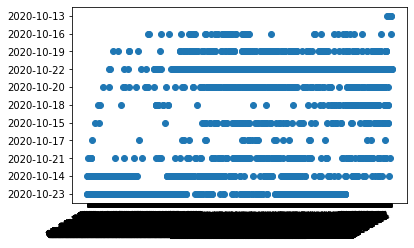

In [247]:
# plot
plt.scatter(timee,datee)
#beautifying the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [248]:
# 00:00:00 to 23:59:59

<AxesSubplot:xlabel='status', ylabel='count'>

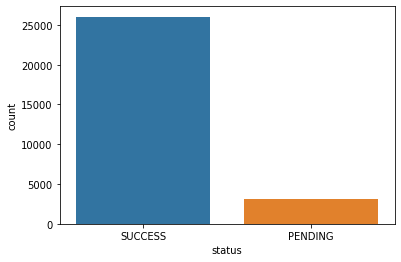

In [249]:
#success to pending plot
sns.countplot(fdf.status)